In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 32*32*3))
x_test  = tf.reshape(x_test, (-1, 32*32*3))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [2]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
196/196 - 4s - loss: 63.6710 - sparse_categorical_accuracy: 0.1945 - val_loss: 7.5248 - val_sparse_categorical_accuracy: 0.2427 - 4s/epoch - 23ms/step
Epoch 2/150
196/196 - 3s - loss: 7.2301 - sparse_categorical_accuracy: 0.2378 - val_loss: 5.0190 - val_sparse_categorical_accuracy: 0.2510 - 3s/epoch - 17ms/step
Epoch 3/150
196/196 - 3s - loss: 4.7799 - sparse_categorical_accuracy: 0.2391 - val_loss: 3.5435 - val_sparse_categorical_accuracy: 0.2394 - 3s/epoch - 17ms/step
Epoch 4/150
196/196 - 3s - loss: 2.7437 - sparse_categorical_accuracy: 0.2769 - val_loss: 2.6880 - val_sparse_categorical_accuracy: 0.2269 - 3s/epoch - 16ms/step
Epoch 5/150
196/196 - 3s - loss: 2.2142 - sparse_categorical_accuracy: 0.2980 - val_loss: 2.1725 - val_sparse_categorical_accuracy: 0.2988 - 3s/epoch - 17ms/step
Epoch 6/150
196/196 - 3s - loss: 2.0175 - sparse_categorical_accuracy: 0.3164 - val_loss: 1.9719 - val_sparse_categorical_accuracy: 0.3215 - 3s/epoch - 14ms/step
Epoch 7/150
196/196 - 3s - 

Epoch 52/150
196/196 - 3s - loss: 2.3024 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1001 - 3s/epoch - 17ms/step
Epoch 53/150
196/196 - 3s - loss: 2.3024 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.1001 - 3s/epoch - 17ms/step
Epoch 54/150
196/196 - 3s - loss: 2.3024 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0999 - 3s/epoch - 16ms/step
Epoch 55/150
196/196 - 3s - loss: 2.3023 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1001 - 3s/epoch - 17ms/step
Epoch 56/150
196/196 - 3s - loss: 2.3025 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3033 - val_sparse_categorical_accuracy: 0.0999 - 3s/epoch - 16ms/step
Epoch 57/150
196/196 - 3s - loss: 2.3026 - sparse_categorical_accuracy: 0.0987 - val_loss: 2.3033 - val_sparse_categorical_accuracy: 0.0998 - 3s/epoch - 16ms/step
Epoch 58/150
196/196 -

Epoch 103/150
196/196 - 3s - loss: 2.3027 - sparse_categorical_accuracy: 0.0972 - val_loss: 2.3037 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 14ms/step
Epoch 104/150
196/196 - 3s - loss: 2.3026 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3037 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 16ms/step
Epoch 105/150
196/196 - 2s - loss: 2.9819 - sparse_categorical_accuracy: 0.0993 - val_loss: 2.3038 - val_sparse_categorical_accuracy: 0.0999 - 2s/epoch - 13ms/step
Epoch 106/150
196/196 - 3s - loss: 2.3028 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3036 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 14ms/step
Epoch 107/150
196/196 - 3s - loss: 2.3027 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3036 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 15ms/step
Epoch 108/150
196/196 - 3s - loss: 2.3027 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3036 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 17ms/step
Epoch 109/150
19

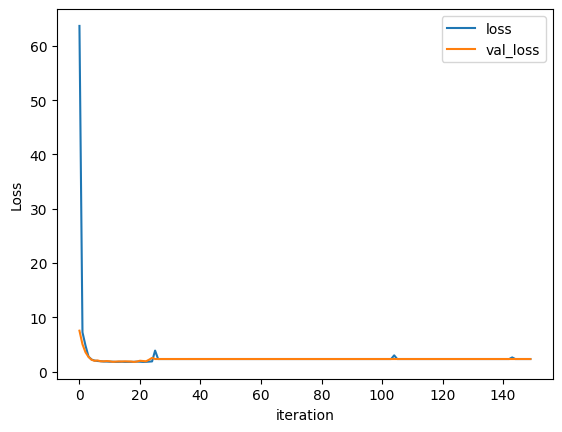

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

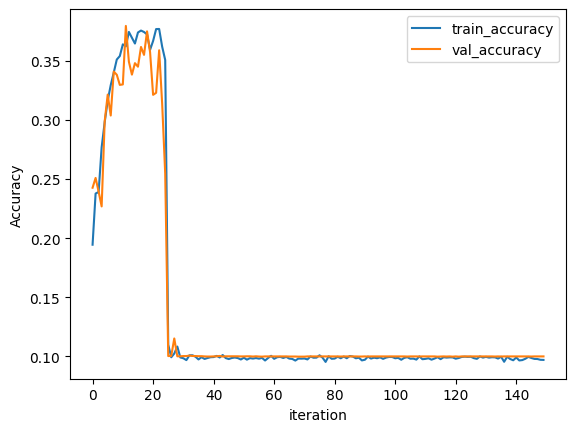

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()